In [43]:
import sys
sys.path.append('../')
sys.path.append('/Users/sdbykov/work/my_packages/nway')

In [44]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import search_around_r_data_frames, cross_match_data_frames
import pandas as pd
import numpy as np
import seaborn as sns
import nway_python_api as nway
set_mpl()
%matplotlib inline

matplotlib settings set


In [45]:
desi_pandas_ph =  pd.read_pickle(data_path+'desi_lh.gz_pkl', compression = 'gzip')
desi_pandas_ph.columns = ['desi_'+x for x in desi_pandas_ph.columns]
desi_pandas_ph.rename(columns={'desi_desi_id':'nway_desi_id'}, inplace=True)

xmm = pd.read_pickle(data_path+'xmm_cleared.pkl')
csc = pd.read_pickle(data_path+'csc_cleared.pkl')

nway = pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_desi_nway_match.gz_pkl', compression='gzip')
nway.reset_index(drop=True, inplace=True)

In [46]:
nway.query('~nway_desi_id_true_ctp.isna()')[['srcname_fin', 'nway_desi_id_true_ctp']]

,srcname_fin,nway_desi_id_true_ctp
1201,SRGe J103105.9+573747,9011_610714_1440
1232,SRGe J103118.8+574434,9011_610714_1908
1241,SRGe J103121.9+573134,hostless
1249,SRGe J103123.8+574309,9011_610714_2092
1271,SRGe J103130.8+573932,9011_610714_2412
...,...,...
9195,SRGe J110633.0+590313,9011_614527_1198
9201,SRGe J110645.0+590331,9011_614527_1596
9202,SRGe J110648.4+585514,9011_614527_1704
9209,SRGe J110721.2+585635,9011_614527_2647


157.8284537310577 157.82796630460354 1.7547352349652101
cross-match radius 30 arcsec
total matches: 1 out of 267265 x 1
	 total unique pairs: 1
	 total non-unique pairs (duplicates in df2): 0
cross-match radius 30 arcsec
total matches: 0 out of 844 x 1
	 total unique pairs: 0
	 total non-unique pairs (duplicates in df2): 0
No XMM
cross-match radius 30 arcsec
total matches: 16 out of 2418574 x 1
	 total unique pairs: 0
	 total non-unique pairs (duplicates in df2): 16
157.87848911862494 157.88003210261854 -5.554742376966715
cross-match radius 30 arcsec
total matches: 1 out of 267265 x 1
	 total unique pairs: 1
	 total non-unique pairs (duplicates in df2): 0
cross-match radius 30 arcsec
total matches: 0 out of 844 x 1
	 total unique pairs: 0
	 total non-unique pairs (duplicates in df2): 0
No XMM
cross-match radius 30 arcsec
total matches: 12 out of 2418574 x 1
	 total unique pairs: 0
	 total non-unique pairs (duplicates in df2): 12
166.83879652285322 166.83847328864377 1.163643154006877
c

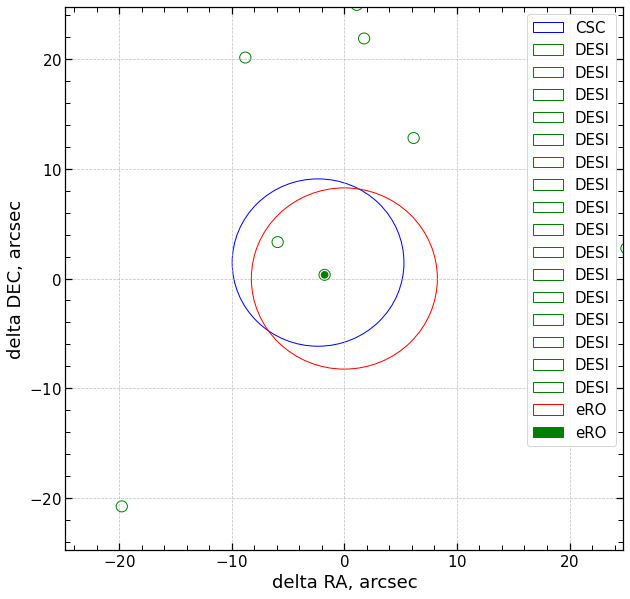

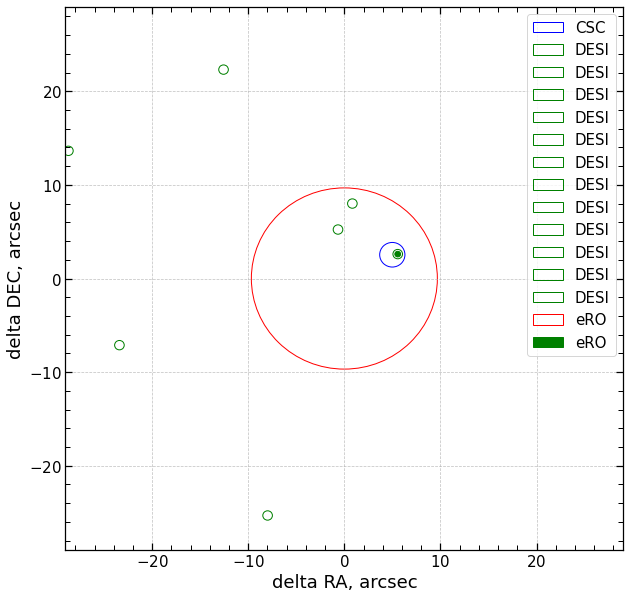

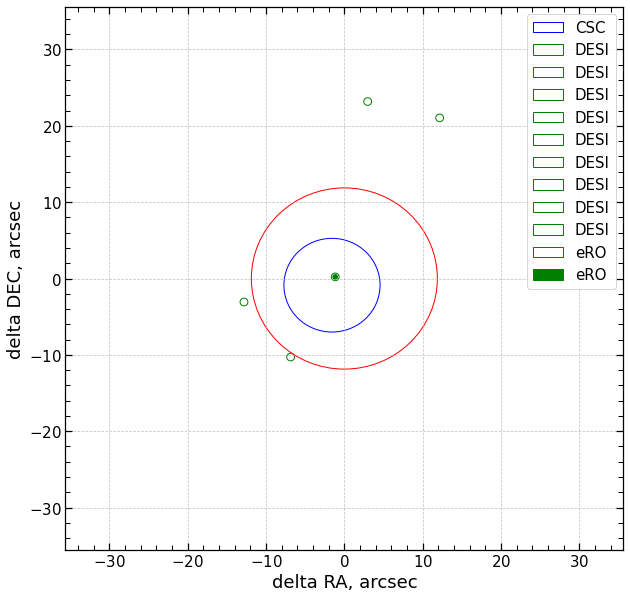

In [64]:
def plot_target(eroid, search_radius  = 30):
    df_query = nway.query("srcname_fin==@eroid")

    ero_ra, ero_dec, ero_err = df_query.iloc[0][['RA_fin', 'DEC_fin', 'pos_r98']]
    nway_ctps_ra, nway_ctps_dec = df_query.iloc[0][['desi_ra', 'desi_dec']]
    print(ero_ra, nway_ctps_ra, 3600*(ero_ra-nway_ctps_ra))



    fig, ax = plt.subplots(figsize=(10, 10))

    csc_around = search_around_r_data_frames(csc, ero_ra, ero_dec, 'ra', 'dec',  search_radius)
    if len(csc_around) == 0:
        print('No CSC')
    else:
        for row in csc_around.itertuples():
            ra, dec, err = row.ra, row.dec, row.r_98_csc
            ra = 3600*(ra - ero_ra)
            dec = 3600*(dec - ero_dec)
            circle = plt.Circle((ra, dec), err, color='b', fill=False, label = 'CSC')
            ax.add_artist(circle)
            


    xmm_around = search_around_r_data_frames(xmm, ero_ra, ero_dec, 'SC_RA', 'SC_DEC',  search_radius)
    if len(xmm_around) == 0:
        print('No XMM')
    else:
        for row in xmm_around.itertuples():
            ra, dec, err = row.SC_RA, row.SC_DEC, row.xmm_pos_r98
            ra = 3600*(ra - ero_ra)
            dec = 3600*(dec - ero_dec)
            circle = plt.Circle((ra, dec), err, color='b', fill=False, label = 'XMM')
            ax.add_artist(circle)



    desi_around = search_around_r_data_frames(desi_pandas_ph, ero_ra, ero_dec, 'desi_ra', 'desi_dec',  search_radius)
    if len(desi_around) == 0:
        print('No DESI')
    else:
        for row in desi_around.itertuples():
            ra, dec, err = row.desi_ra, row.desi_dec, 0.5
            ra = 3600*(ra - ero_ra)
            dec = 3600*(dec - ero_dec)
            circle = plt.Circle((ra, dec), err, color='g', fill=False, label = '_DESI')
            ax.add_artist(circle)

    circle = plt.Circle((0, 0), ero_err, color='r', fill=False, label = 'eRO')
    ax.add_artist(circle)


    circle = plt.Circle((3600*(nway_ctps_ra- ero_ra), 3600*(nway_ctps_dec-ero_dec)), 0.3, color='g', fill=True, label = 'NWAY CTP')
    ax.add_artist(circle)


    axislim = 3*ero_err

    ax.set_xlim(-axislim, axislim)
    ax.set_ylim(-axislim, axislim)

    ax.set_xlabel('delta RA, arcsec')
    ax.set_ylabel('delta DEC, arcsec')
    ax.legend()


plot_target('SRGe J103118.8+574434')
plot_target('SRGe J103130.8+573932')
plot_target('SRGe J110721.3+590113')
